In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import logging
from sklearn.utils import parallel_backend
from tqdm import tqdm
from sklearn.utils import parallel_backend
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [240]:
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)

In [241]:
#base_dir = '/content/drive/MyDrive/Retail Stores Project/Data.csv'

### Data Importation

In [242]:
# Load the CSV file

import pandas as pd

# Define the file path
file_path = 'C:/Users/QIAcuity/Desktop/Angel/Work_Space/Blossom Academy/Capstone Project/Retail Stores Project/Data.csv'

# Load the data
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to verify loading
data.head(10)


,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
5,DRA12,BABATUNJI045,DRA12_BABATUNJI045,11.60,Low Sugar,0.000000,Soft Drinks,354.04,2009,NaN,Cluster 2,Supermarket Type1,9572.54
6,DRA24,BABATUNJI010,DRA24_BABATUNJI010,19.35,Normal Sugar,0.066832,Soft Drinks,409.72,2005,NaN,Cluster 3,Grocery Store,818.93
7,DRA24,BABATUNJI013,DRA24_BABATUNJI013,19.35,Normal Sugar,0.039895,Soft Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61
8,DRA24,BABATUNJI017,DRA24_BABATUNJI017,19.35,Normal Sugar,0.040154,Soft Drinks,411.72,2014,NaN,Cluster 2,Supermarket Type1,2866.27
9,DRA24,BABATUNJI019,DRA24_BABATUNJI019,NaN,Normal Sugar,0.069909,Soft Drinks,408.22,1992,Small,Cluster 1,Grocery Store,1228.40


### Handling Missing Values

In [243]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values and their counts
missing_values[missing_values > 0]

Item_Weight     802
Store_Size     1450
dtype: int64

In [244]:


# Forward fill for 'Item_Weight' column
data['Item_Weight'] = data['Item_Weight'].ffill()



# Replace missing values with the most frequent category (mode) of the column
most_frequent = data['Store_Size'].mode()[0]
data['Store_Size'] = data['Store_Size'].fillna(most_frequent)

In [245]:
data.head(10)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
5,DRA12,BABATUNJI045,DRA12_BABATUNJI045,11.60,Low Sugar,0.000000,Soft Drinks,354.04,2009,Medium,Cluster 2,Supermarket Type1,9572.54
6,DRA24,BABATUNJI010,DRA24_BABATUNJI010,19.35,Normal Sugar,0.066832,Soft Drinks,409.72,2005,Medium,Cluster 3,Grocery Store,818.93
7,DRA24,BABATUNJI013,DRA24_BABATUNJI013,19.35,Normal Sugar,0.039895,Soft Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61
8,DRA24,BABATUNJI017,DRA24_BABATUNJI017,19.35,Normal Sugar,0.040154,Soft Drinks,411.72,2014,Medium,Cluster 2,Supermarket Type1,2866.27
9,DRA24,BABATUNJI019,DRA24_BABATUNJI019,19.35,Normal Sugar,0.069909,Soft Drinks,408.22,1992,Small,Cluster 1,Grocery Store,1228.40


### Exploratory Data Analysis

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4990 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           4990 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


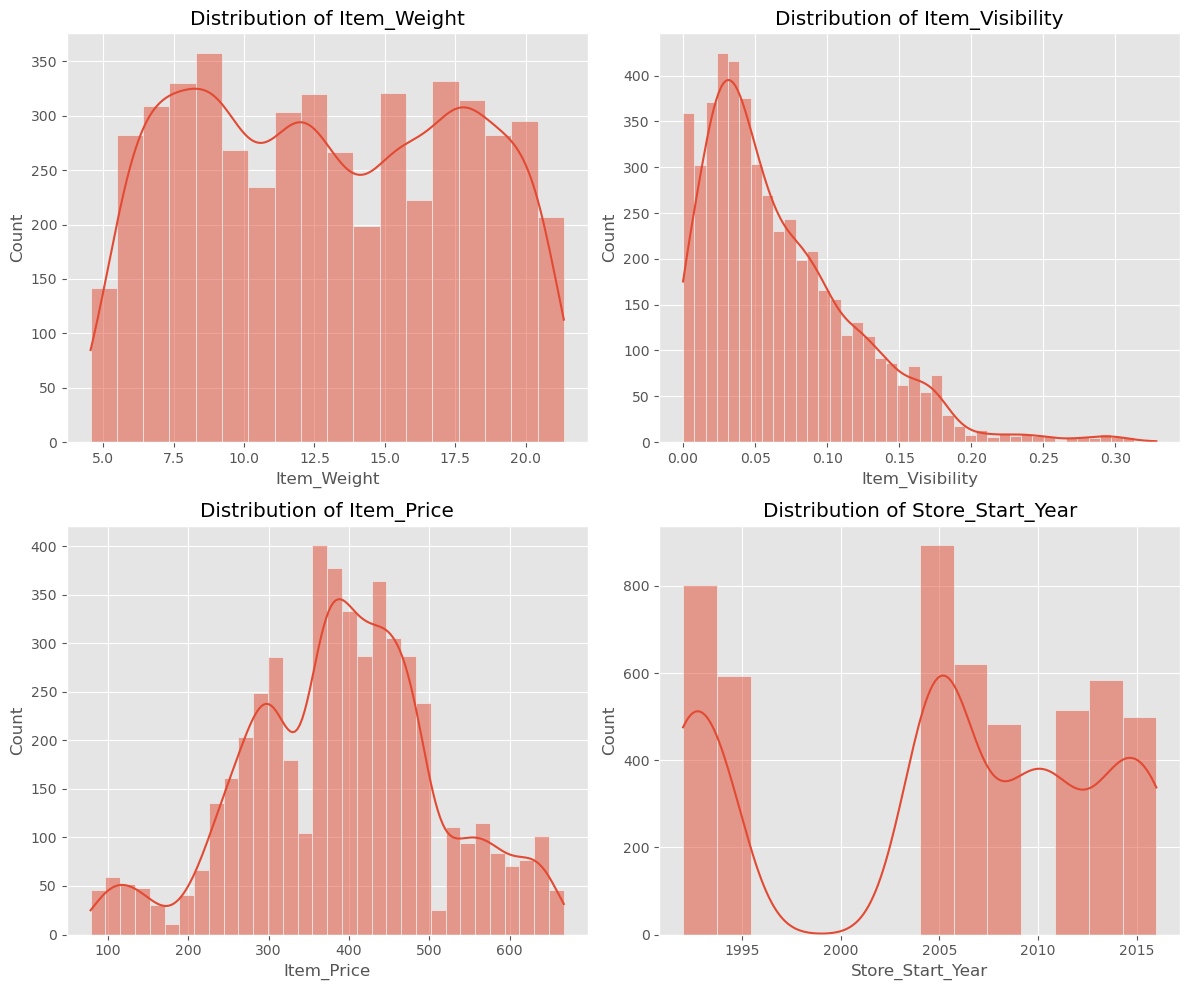

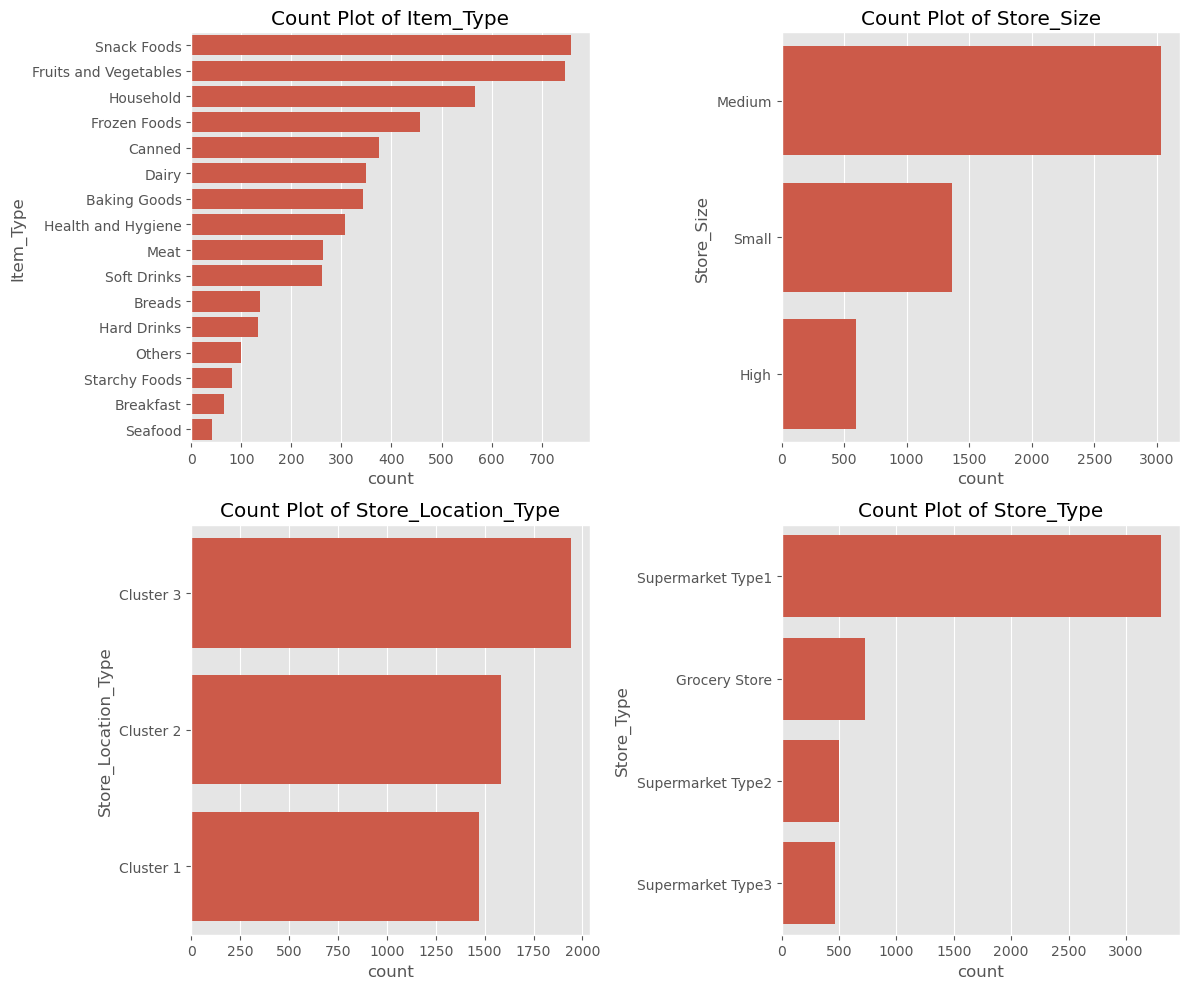

In [247]:


# Set up the plotting environment
plt.style.use('ggplot')



# Univariate Analysis: Distribution of numerical features
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Univariate Analysis: Count plots for categorical features
categorical_features = ['Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(y=data[feature], ax=axes[i], order=data[feature].value_counts().index)
    axes[i].set_title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()


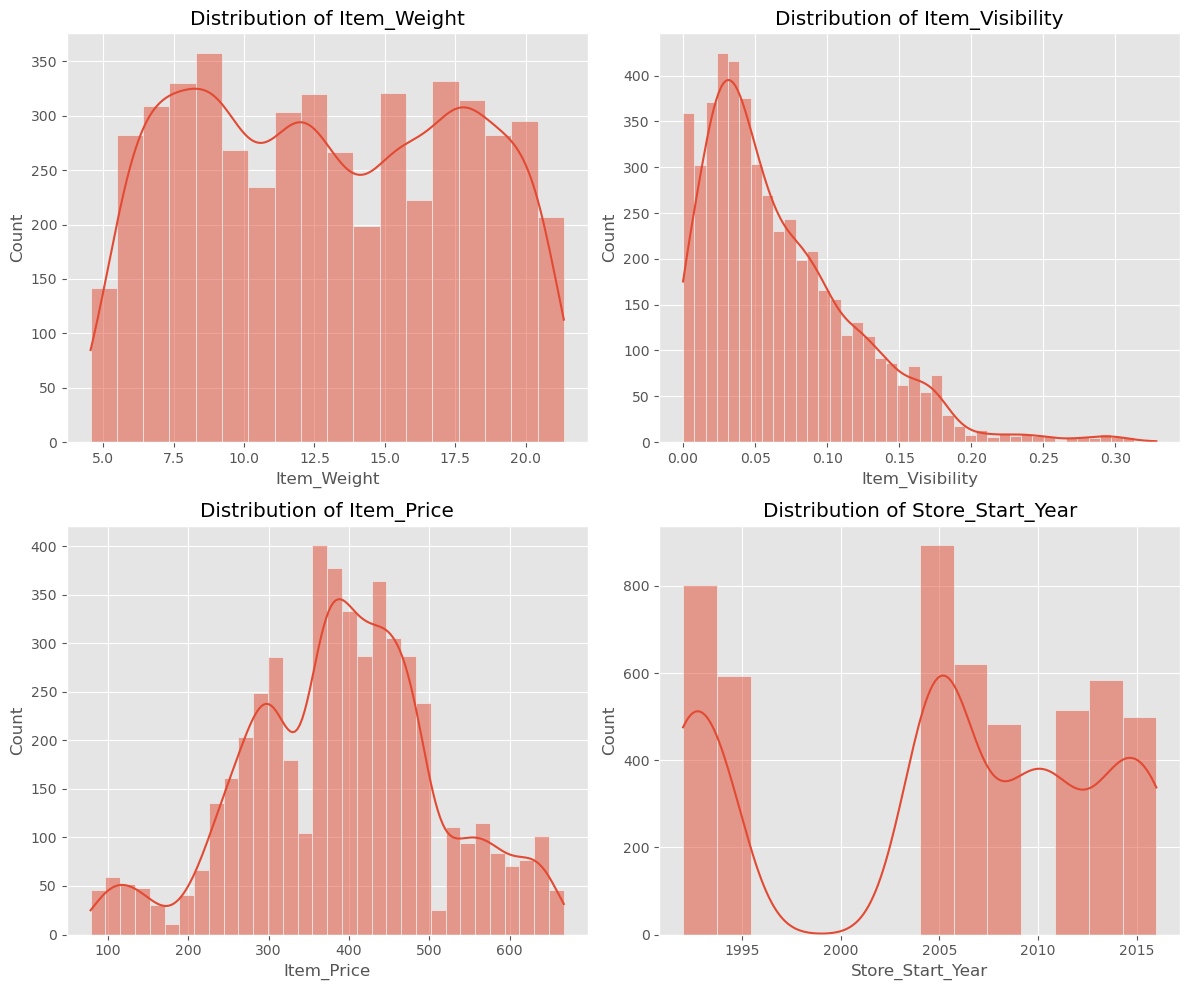

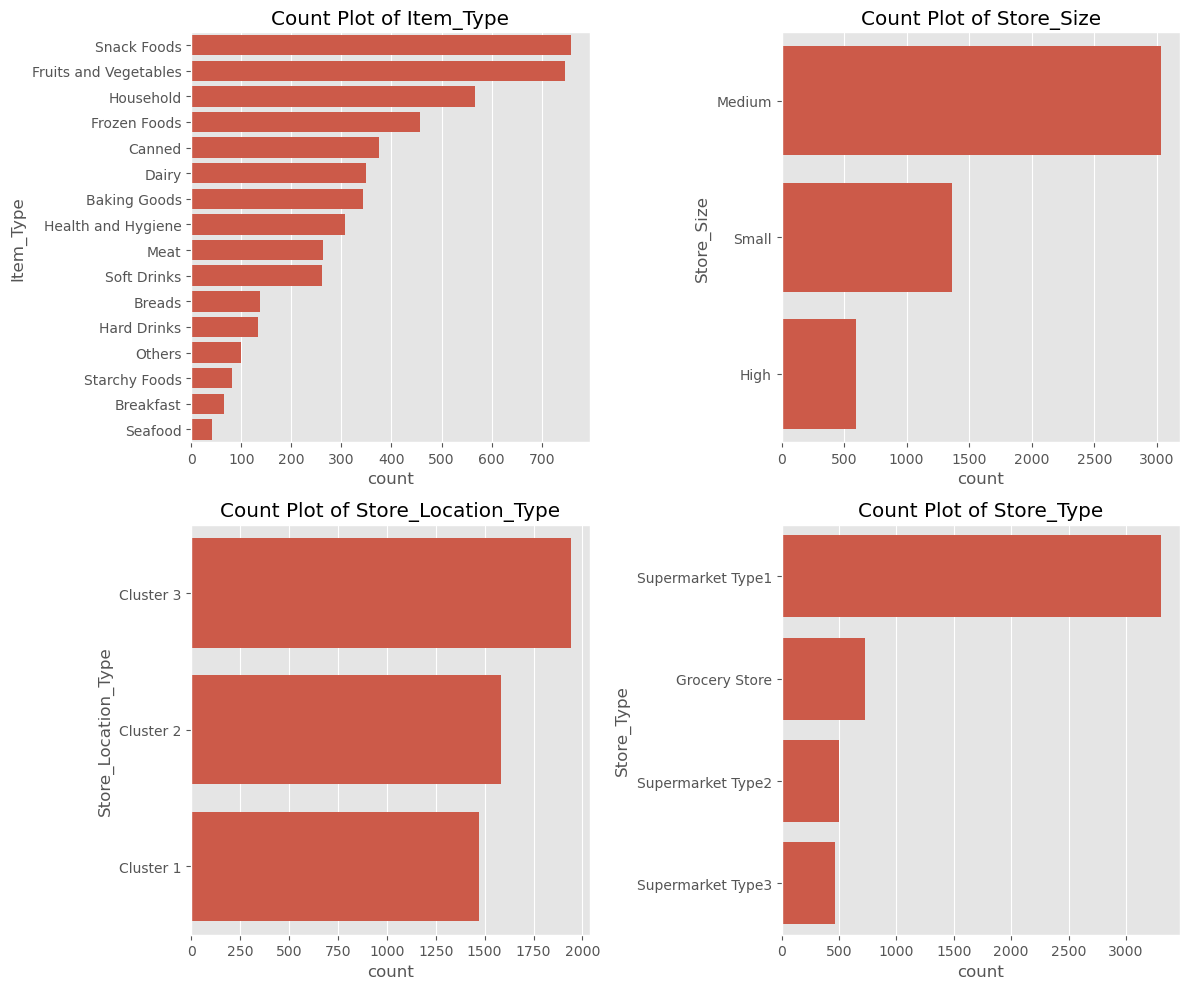

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.style.use('ggplot')

# Univariate Analysis: Distribution of numerical features
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Univariate Analysis: Count plots for categorical features
categorical_features = ['Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(y=data[feature], ax=axes[i], order=data[feature].value_counts().index)
    axes[i].set_title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()


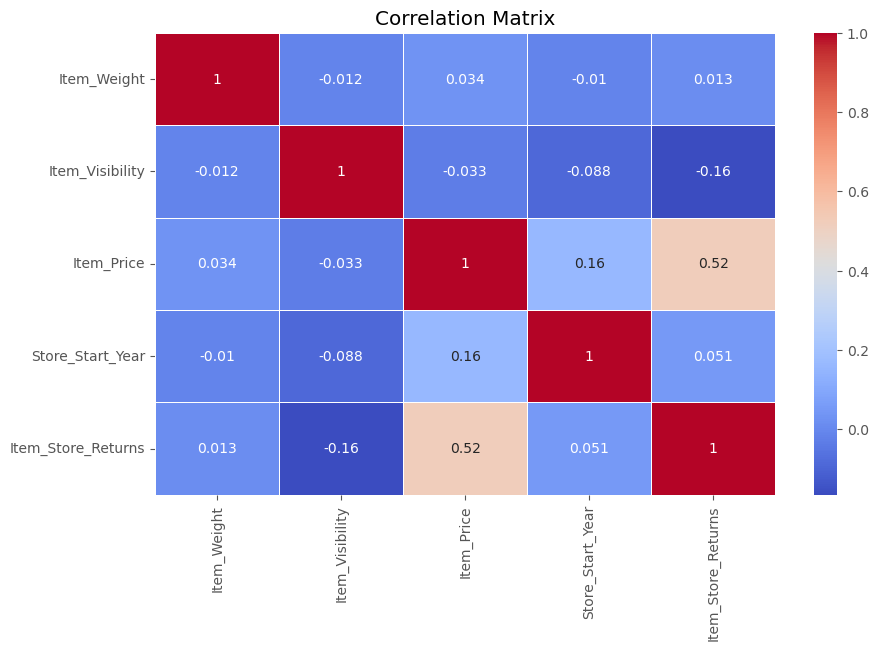

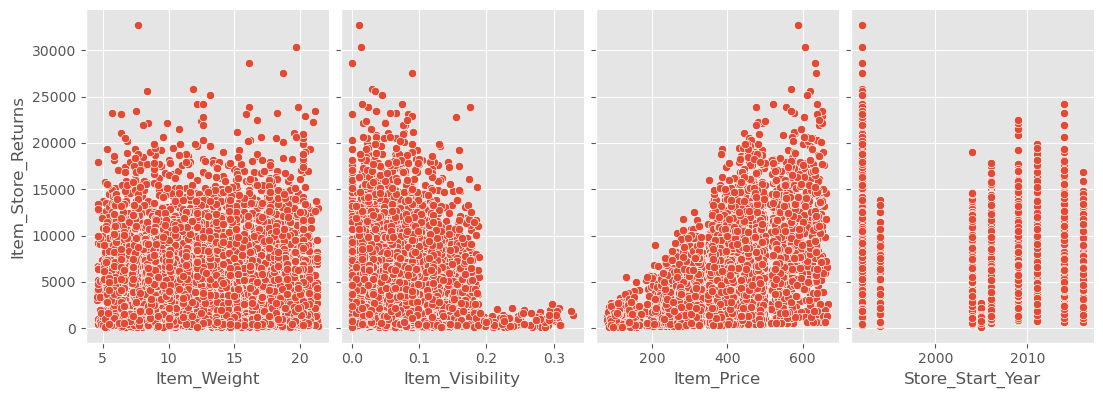

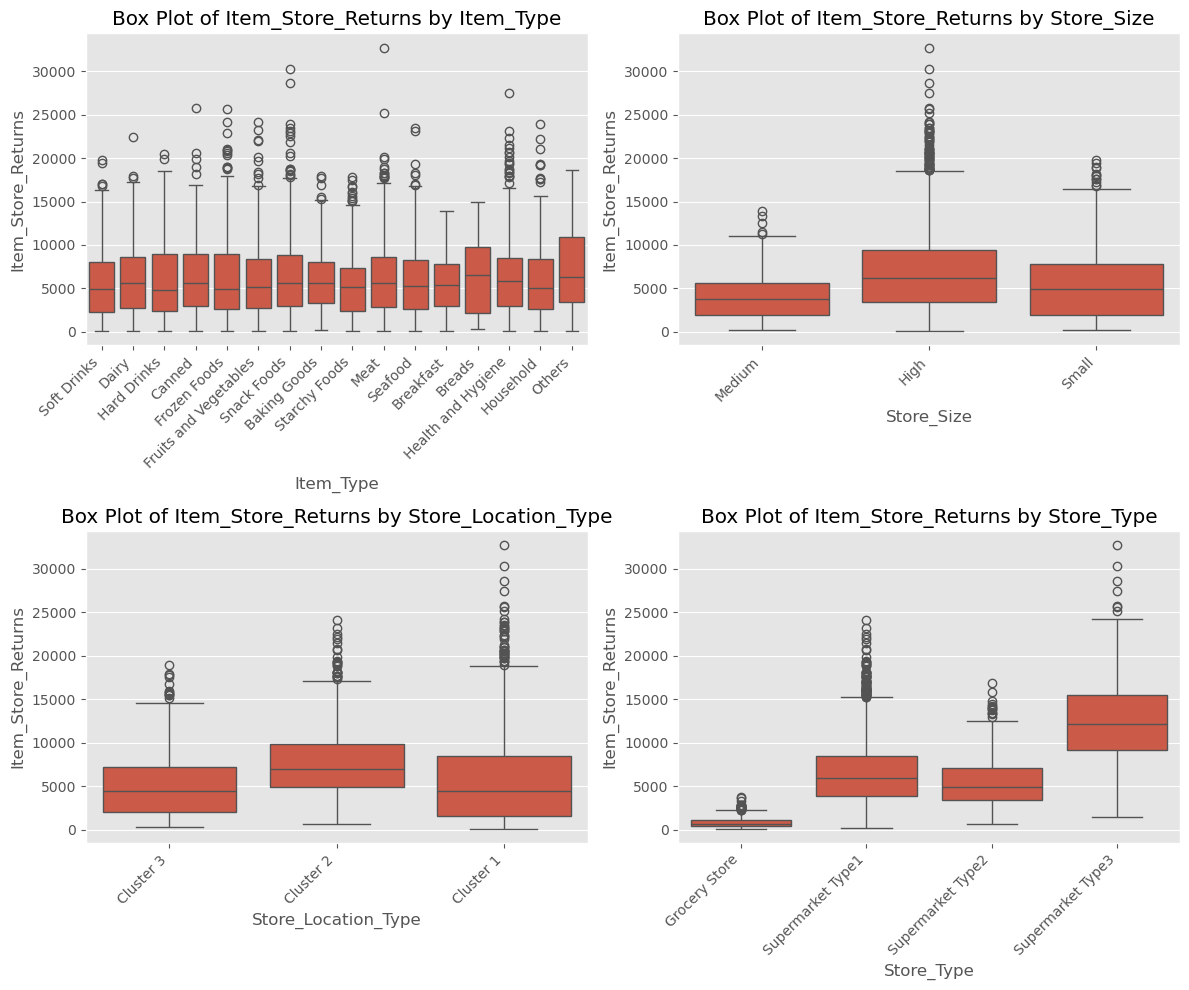

In [249]:


# Ensure categorical columns are of type 'category'
categorical_features = ['Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']
for feature in categorical_features:
    data[feature] = data[feature].astype('category')

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Bivariate Analysis: Scatter plots and correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Bivariate Analysis: Scatter plots
sns.pairplot(data, x_vars=numerical_features, y_vars='Item_Store_Returns', height=4, aspect=0.7)
plt.show()

# Bivariate Analysis: Box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

categorical_features = ['Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=data[feature], y=data['Item_Store_Returns'], ax=axes[i])
    axes[i].set_title(f'Box Plot of Item_Store_Returns by {feature}')
    axes[i].set_xticks(range(len(data[feature].unique())))
    axes[i].set_xticklabels(data[feature].unique(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [250]:
import joblib

# Load the saved model
#model_path = '/content/drive/MyDrive/Retail Stores Project/ML_Random_Forest_Predictor.sav'
#model = joblib.load(model_path)


### Feature Engineering and Model Training 

c:\Users\QIAcuity\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 55205896.0000 - mae: 5944.2588 - val_loss: 49943172.0000 - val_mae: 5453.2065
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37276124.0000 - mae: 4586.1885 - val_loss: 13650217.0000 - val_mae: 2863.2820
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12317819.0000 - mae: 2726.5364 - val_loss: 12400464.0000 - val_mae: 2713.5107
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11679645.0000 - mae: 2687.1650 - val_loss: 11897604.0000 - val_mae: 2677.9854
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10928014.0000 - mae: 2593.1787 - val_loss: 11579800.0000 - val_mae: 2634.2891
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11096140.0000 - mae: 2605.7500 - val_loss: 11410687.0000 - val_mae: 2587.8752
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10747503.0000 - mae: 2564.2029 - val_loss: 11119166.0000 - val_mae: 2563.4309
Epoch 8/100
100/100 ━━━━━━━

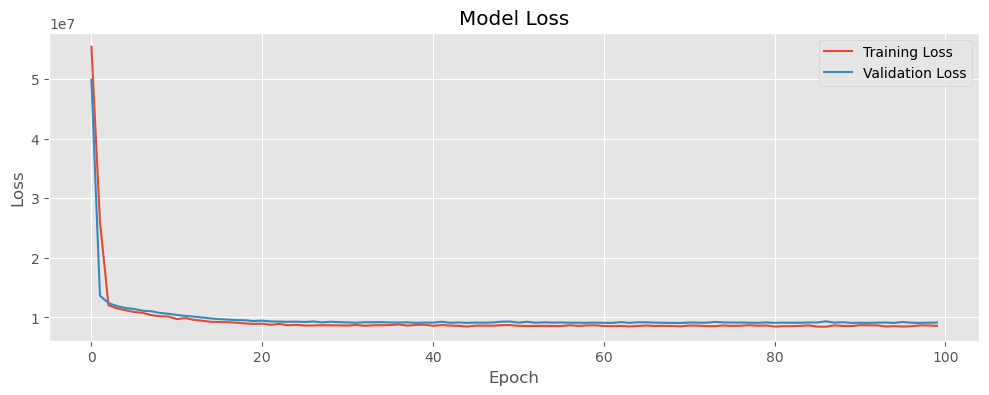

In [251]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU usage

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib

# Load your data (replace this with your actual data loading code)
# data_path = '/path/to/your_data.csv'  # Replace with your data file path
# data = pd.read_csv(data_path)

# Forward fill for 'Item_Weight' column
data['Item_Weight'] = data['Item_Weight'].ffill()

# Replace missing values in 'Store_Size' with the most frequent category (mode)
most_frequent = data['Store_Size'].mode()[0]
data['Store_Size'] = data['Store_Size'].fillna(most_frequent)

# Ensure categorical columns are of type 'category'
categorical_features = ['Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']
for feature in categorical_features:
    data[feature] = data[feature].astype('category')

# Define feature columns and target variable
X = data.drop(columns=['Item_Store_Returns'])  # Features
y = data['Item_Store_Returns']  # Target variable

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['category']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Preprocessing for numerical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the deep learning model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Make predictions with the trained model
y_pred = model.predict(X_test).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the learning and validation curves
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Save the preprocessor and model in native Keras format
joblib.dump(preprocessor, 'preprocessor_pipeline.sav')
model.save('deep_learning_model.keras')
